In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats
from scipy import signal
import seaborn as sns

In [47]:
class DMP:
    def __init__(self, num_bfs = 5):
        self.num_bfs = num_bfs     # num of basis functions
        self.K = 25*25/4     # Spring coefficient
        self.B = 25          # damper coefficient
        self.C = np.linspace(0, 1, self.num_bfs)    # num of basis fn centers
        self.H = 0.65*(1/(self.num_bfs - 1))**2      # bf widths
        
        self.weights = [0, 0, 0, 0, 0]
        self.start = self.goal = self.T = 0
        self.q = self.qd = self.qdd = 0
        
    def set_task_params(self, start, goal, T, dt):
        self.dt = dt
        self.start = start
        self.goal = goal
        self.T = T
        self.q = self.start
        self.qd = self.qdd = 0
        self.q_sd = self.start
        self.qd_sd = self.qdd_sd = 0
        
    def fwd_simulate(self, horizon, weights):
        t = 0
        pos = []
        pos_sd = []
        for i in range(horizon):
            t += self.dt
            if t <= self.T:
                phi = [np.exp(-((t/self.T - c)**2)/2/self.H) for c in self.C]
                phi /= np.sum(phi)
#                 print(phi)
                f = np.dot(phi, weights)
#                 print(f)
            else:
                f = 0
            self.qdd = (self.K*(self.goal-self.q)/(self.T**2)) - self.B*self.qd/self.T + (self.goal-self.start)*f/(self.T**2)
            self.qd += self.qdd * self.dt
            self.q += self.qd * self.dt
            pos.append(self.q)
            
            self.qdd_sd = (self.K*(self.goal-self.q_sd)/(self.T**2)) - self.B*self.qd_sd/self.T
            self.qd_sd += self.qdd_sd * self.dt
            self.q_sd += self.qd_sd * self.dt
            pos_sd.append(self.q_sd)
        return np.array(pos), np.array(pos_sd)

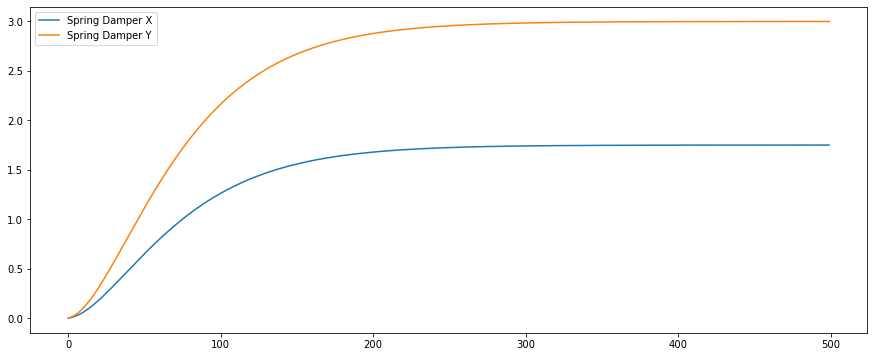

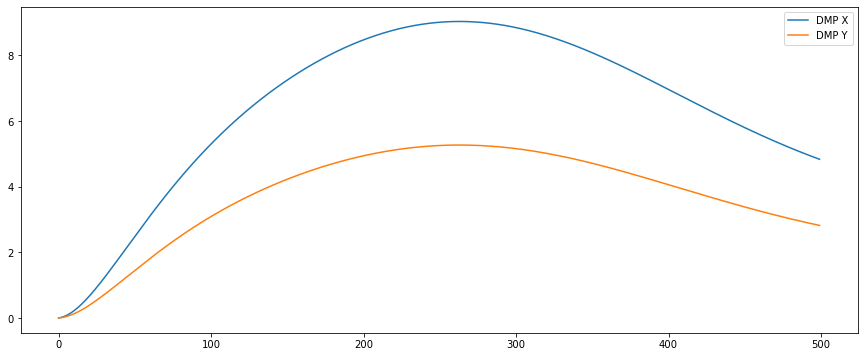

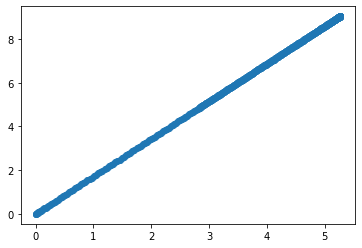

In [135]:
dmp = DMP()
start = np.array((0,0))
goal = np.array((1.75, 3))

weights = np.array([5,40,40,7,0])
# weights = (weights-np.min(weights))/(np.max(weights)-np.min(weights))

dmp.set_task_params(start[0], goal[0], 5, 0.01)
pos_x, posx_sd = dmp.fwd_simulate(500, 10*weights)
dmp.set_task_params(start[1], goal[1], 5, 0.01)
pos_y, posy_sd = dmp.fwd_simulate(500, 10*weights)
plt.figure(figsize=(15,6))
plt.plot(posx_sd, label="Spring Damper X")
plt.plot(posy_sd, label="Spring Damper Y")
plt.legend()
plt.show()
plt.figure(figsize=(15,6))
plt.plot(pos_y, label="DMP X")
plt.plot(pos_x, label="DMP Y")
plt.legend()
plt.show()
plt.scatter(pos_x, pos_y)

[ 1250. 10000. 10000.  1750.     0.]
(23000,)


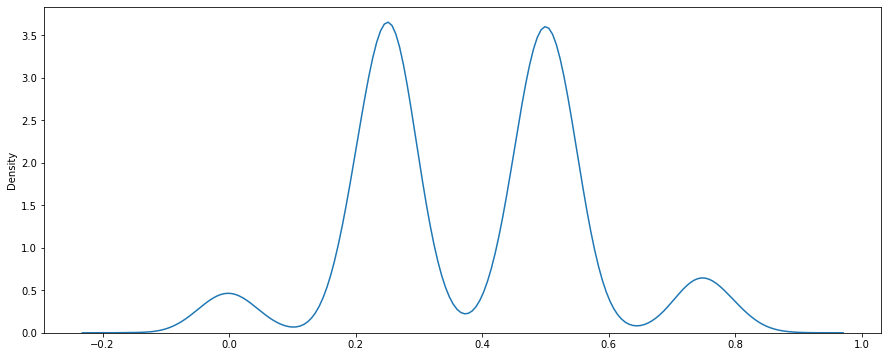

In [134]:
plt.figure(figsize=(15,6))
basis_fns = [np.random.normal(mu, dmp.H, 10000) for n,mu in enumerate(dmp.C)]
# _ = [weights[n]*sns.kdeplot(bf) for n,bf in enumerate(basis_fns)]

weights = np.array([5,40,40,7,0])
# weights = np.array([-5,-10,10,1,0])
norm_wts = 10000*(weights-np.min(weights))/(np.max(weights)-np.min(weights))
# norm_wts = 10000*np.ones(5)/5
print(norm_wts)
final_dist = np.concatenate([np.random.choice(bf, norm_wts[n].astype(np.int32)) for n,bf in enumerate(basis_fns)])
print(final_dist.shape)
a = sns.kdeplot(final_dist)

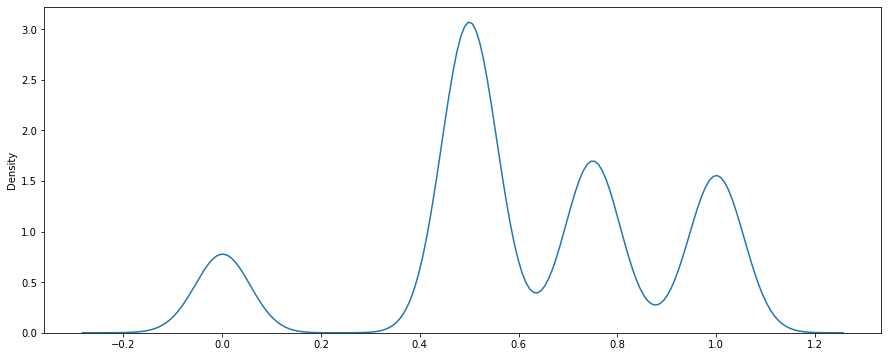

In [96]:
plt.figure(figsize=(15,6))
basis_fns = [np.random.normal(mu, dmp.H, 10000) for n,mu in enumerate(dmp.C)]
# _ = [weights[n]*sns.kdeplot(bf) for n,bf in enumerate(basis_fns)]

norm_wts = 10000*(weights-np.min(weights))/(np.max(weights)-np.min(weights))
final_dist = np.concatenate([np.random.choice(bf, norm_wts[n].astype(np.int32)) for n,bf in enumerate(basis_fns)])
a = sns.kdeplot(final_dist)

[ 2500.     0. 10000.  5500.  5000.]
(23000,)
[nan  0. nan nan nan]


C:\Users\sbpat\AppData\Local\Temp\ipykernel_28592\1276024478.py:10: RuntimeWarning: overflow encountered in exp
  norm_wts = (np.exp(norm_wts))/(np.sum(np.exp(norm_wts)))
C:\Users\sbpat\AppData\Local\Temp\ipykernel_28592\1276024478.py:10: RuntimeWarning: invalid value encountered in true_divide
  norm_wts = (np.exp(norm_wts))/(np.sum(np.exp(norm_wts)))


ValueError: negative dimensions are not allowed

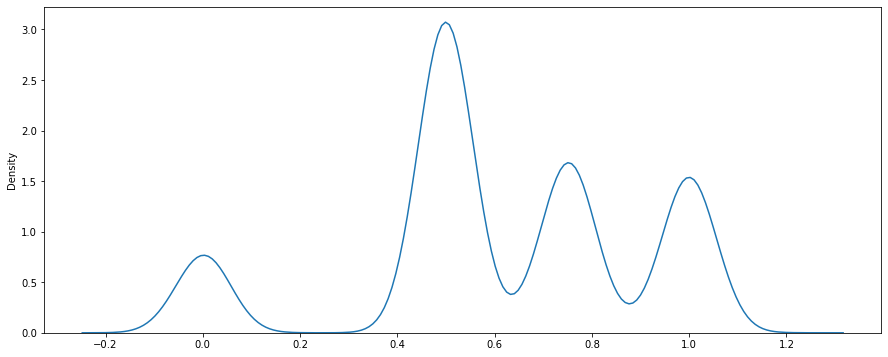

In [98]:
plt.figure(figsize=(15,6))
basis_fns = [np.random.normal(mu, dmp.H, 10000) for n,mu in enumerate(dmp.C)]
# _ = [weights[n]*sns.kdeplot(bf) for n,bf in enumerate(basis_fns)]

norm_wts = 10000*(weights-np.min(weights))/(np.max(weights)-np.min(weights))
print(norm_wts)
final_dist = np.concatenate([np.random.choice(bf, norm_wts[n].astype(np.int32)) for n,bf in enumerate(basis_fns)])
print(final_dist.shape)
a = sns.kdeplot(final_dist)
norm_wts = (np.exp(norm_wts))/(np.sum(np.exp(norm_wts)))
print(norm_wts)
final_dist = np.concatenate([np.random.choice(bf, norm_wts[n].astype(np.int32)) for n,bf in enumerate(basis_fns)])
print(final_dist.shape)
a = sns.kdeplot(final_dist)
x, y = a.lines[0].get_data()

In [71]:
y.shape

(200,)

In [ ]:
dmp = DMP()
for i in range(100):
    weights = np.random.normal([0,0,0,0,0,-0.1,-0.1, 0, 0, 0.1], 0.35, 10)
    dmp.set_task_params(0, 0.015, 5, 0.01)
    pos_x = dmp.fwd_simulate(500, 200*np.array(weights[:5]))
    dmp.set_task_params(0, 0.035, 5, 0.01)
    print(f"Start: {start[1]}, Goal: {goal[1]}, Weight: {weights}")
    pos_y = dmp.fwd_simulate(500, 200*np.array(weights[5:]))
    
    pos_x2 = pos_x[::len(pos_x)//20]
    pos_y2 = pos_y[::len(pos_y)//20]
    skill_traj = np.vstack([pos_x2, pos_y2]).T
    skill_traj[:, 0] = 100*np.clip(skill_traj[:, 0], -0.005, 0.025)
    skill_traj[:, 1] = 100*np.clip(skill_traj[:, 1], -0.005, 0.05)
    print(skill_traj.shape)
    
    plt.plot(skill_traj[:,0], skill_traj[:,1])
    _ = plt.plot(pos_x, pos_y)
    plt.show()